## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.
C:\Users\apply\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\apply\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\apply\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\apply\AppData\Roa

In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [5]:
def build_mlp():
    """Code Here
    建立你的神經網路
    """
    
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])

    return model
model = build_mlp()

In [6]:
"""
Compile 模型
"""
model = build_mlp()
# 用 Keras 內建方法檢視模型各層參數量
model.summary()

optimizer = keras.optimizers.SGD(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_7 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_8 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_9 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [7]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 5s 95us/step - loss: 2.2661 - accuracy: 0.1527 - val_loss: 2.2136 - val_accuracy: 0.2048
Epoch 2/500
50000/50000 [==============================] - 4s 78us/step - loss: 2.1828 - accuracy: 0.2171 - val_loss: 2.1542 - val_accuracy: 0.2440
Epoch 3/500
50000/50000 [==============================] - 4s 73us/step - loss: 2.1302 - accuracy: 0.2505 - val_loss: 2.1064 - val_accuracy: 0.2635
Epoch 4/500
50000/50000 [==============================] - 4s 74us/step - loss: 2.0867 - accuracy: 0.2698 - val_loss: 2.0678 - val_accuracy: 0.2783
Epoch 5/500
50000/50000 [==============================] - 3s 69us/step - loss: 2.0508 - accuracy: 0.2849 - val_loss: 2.0338 - val_accuracy: 0.2927
Epoch 6/500
50000/50000 [==============================] - 3s 70us/step - loss: 2.0202 - accuracy: 0.2975 - val_loss: 2.0050 - val_accuracy: 0.3030
Epoch 7/500
50

Epoch 54/500
50000/50000 [==============================] - 3s 69us/step - loss: 1.6724 - accuracy: 0.4180 - val_loss: 1.6773 - val_accuracy: 0.4170
Epoch 55/500
50000/50000 [==============================] - 4s 74us/step - loss: 1.6697 - accuracy: 0.4185 - val_loss: 1.6744 - val_accuracy: 0.4189
Epoch 56/500
50000/50000 [==============================] - 3s 69us/step - loss: 1.6665 - accuracy: 0.4195 - val_loss: 1.6730 - val_accuracy: 0.4153
Epoch 57/500
50000/50000 [==============================] - 3s 70us/step - loss: 1.6636 - accuracy: 0.4191 - val_loss: 1.6684 - val_accuracy: 0.4210
Epoch 58/500
50000/50000 [==============================] - 3s 67us/step - loss: 1.6606 - accuracy: 0.4200 - val_loss: 1.6670 - val_accuracy: 0.4193
Epoch 59/500
50000/50000 [==============================] - 3s 69us/step - loss: 1.6579 - accuracy: 0.4219 - val_loss: 1.6639 - val_accuracy: 0.4219
Epoch 60/500
50000/50000 [==============================] - 3s 66us/step - loss: 1.6552 - accuracy: 0.4234

Epoch 109/500
50000/50000 [==============================] - 4s 75us/step - loss: 1.5395 - accuracy: 0.4645 - val_loss: 1.5614 - val_accuracy: 0.4578
Epoch 110/500
50000/50000 [==============================] - 4s 85us/step - loss: 1.5375 - accuracy: 0.4652 - val_loss: 1.5608 - val_accuracy: 0.4542
Epoch 111/500
50000/50000 [==============================] - 5s 91us/step - loss: 1.5357 - accuracy: 0.4658 - val_loss: 1.5559 - val_accuracy: 0.4575
Epoch 112/500
50000/50000 [==============================] - 4s 78us/step - loss: 1.5338 - accuracy: 0.4669 - val_loss: 1.5541 - val_accuracy: 0.4585
Epoch 113/500
50000/50000 [==============================] - 4s 75us/step - loss: 1.5318 - accuracy: 0.4659 - val_loss: 1.5557 - val_accuracy: 0.4559
Epoch 114/500
50000/50000 [==============================] - 4s 75us/step - loss: 1.5298 - accuracy: 0.4678 - val_loss: 1.5506 - val_accuracy: 0.4584
Epoch 115/500
50000/50000 [==============================] - 3s 70us/step - loss: 1.5278 - accuracy:

50000/50000 [==============================] - 3s 68us/step - loss: 1.4464 - accuracy: 0.4972 - val_loss: 1.4903 - val_accuracy: 0.4756
Epoch 164/500
50000/50000 [==============================] - 3s 68us/step - loss: 1.4449 - accuracy: 0.4977 - val_loss: 1.4861 - val_accuracy: 0.4772
Epoch 165/500
50000/50000 [==============================] - 4s 70us/step - loss: 1.4428 - accuracy: 0.4992 - val_loss: 1.4843 - val_accuracy: 0.4773
Epoch 166/500
50000/50000 [==============================] - 3s 69us/step - loss: 1.4414 - accuracy: 0.4992 - val_loss: 1.4851 - val_accuracy: 0.4770
Epoch 167/500
50000/50000 [==============================] - 3s 69us/step - loss: 1.4399 - accuracy: 0.5008 - val_loss: 1.4833 - val_accuracy: 0.4806
Epoch 168/500
50000/50000 [==============================] - 3s 68us/step - loss: 1.4383 - accuracy: 0.5003 - val_loss: 1.4838 - val_accuracy: 0.4716
Epoch 169/500
50000/50000 [==============================] - 3s 69us/step - loss: 1.4367 - accuracy: 0.5005 - val_

50000/50000 [==============================] - 4s 89us/step - loss: 1.3679 - accuracy: 0.5249 - val_loss: 1.4311 - val_accuracy: 0.4938
Epoch 218/500
50000/50000 [==============================] - 4s 83us/step - loss: 1.3655 - accuracy: 0.5261 - val_loss: 1.4386 - val_accuracy: 0.4934
Epoch 219/500
50000/50000 [==============================] - 4s 77us/step - loss: 1.3649 - accuracy: 0.5256 - val_loss: 1.4392 - val_accuracy: 0.4911
Epoch 220/500
50000/50000 [==============================] - 4s 79us/step - loss: 1.3634 - accuracy: 0.5259 - val_loss: 1.4329 - val_accuracy: 0.4920
Epoch 221/500
50000/50000 [==============================] - 4s 74us/step - loss: 1.3616 - accuracy: 0.5271 - val_loss: 1.4422 - val_accuracy: 0.4928
Epoch 222/500
50000/50000 [==============================] - 4s 73us/step - loss: 1.3606 - accuracy: 0.5279 - val_loss: 1.4362 - val_accuracy: 0.4951
Epoch 223/500
50000/50000 [==============================] - 4s 73us/step - loss: 1.3591 - accuracy: 0.5279 - val_

Epoch 272/500
50000/50000 [==============================] - 3s 66us/step - loss: 1.2976 - accuracy: 0.5480 - val_loss: 1.3972 - val_accuracy: 0.5058
Epoch 273/500
50000/50000 [==============================] - 3s 66us/step - loss: 1.2955 - accuracy: 0.5481 - val_loss: 1.3966 - val_accuracy: 0.5070
Epoch 274/500
50000/50000 [==============================] - 3s 67us/step - loss: 1.2948 - accuracy: 0.5489 - val_loss: 1.4004 - val_accuracy: 0.5036
Epoch 275/500
50000/50000 [==============================] - 3s 66us/step - loss: 1.2941 - accuracy: 0.5490 - val_loss: 1.4118 - val_accuracy: 0.4965
Epoch 276/500
50000/50000 [==============================] - 3s 66us/step - loss: 1.2930 - accuracy: 0.5492 - val_loss: 1.3931 - val_accuracy: 0.5096
Epoch 277/500
50000/50000 [==============================] - 3s 66us/step - loss: 1.2920 - accuracy: 0.5501 - val_loss: 1.3944 - val_accuracy: 0.5087
Epoch 278/500
50000/50000 [==============================] - 3s 66us/step - loss: 1.2906 - accuracy:

50000/50000 [==============================] - 4s 72us/step - loss: 1.2364 - accuracy: 0.5672 - val_loss: 1.3828 - val_accuracy: 0.5078
Epoch 327/500
50000/50000 [==============================] - 4s 77us/step - loss: 1.2357 - accuracy: 0.5680 - val_loss: 1.3726 - val_accuracy: 0.5173
Epoch 328/500
50000/50000 [==============================] - 3s 70us/step - loss: 1.2340 - accuracy: 0.5690 - val_loss: 1.3722 - val_accuracy: 0.5177
Epoch 329/500
50000/50000 [==============================] - 3s 68us/step - loss: 1.2332 - accuracy: 0.5694 - val_loss: 1.3753 - val_accuracy: 0.5136
Epoch 330/500
50000/50000 [==============================] - 3s 66us/step - loss: 1.2315 - accuracy: 0.5723 - val_loss: 1.3741 - val_accuracy: 0.5172
Epoch 331/500
50000/50000 [==============================] - 3s 66us/step - loss: 1.2308 - accuracy: 0.5713 - val_loss: 1.3755 - val_accuracy: 0.5115
Epoch 332/500
50000/50000 [==============================] - 3s 66us/step - loss: 1.2297 - accuracy: 0.5710 - val_

Epoch 381/500
50000/50000 [==============================] - 3s 69us/step - loss: 1.1794 - accuracy: 0.5880 - val_loss: 1.3542 - val_accuracy: 0.5221
Epoch 382/500
50000/50000 [==============================] - 4s 76us/step - loss: 1.1772 - accuracy: 0.5880 - val_loss: 1.3556 - val_accuracy: 0.5225
Epoch 383/500
50000/50000 [==============================] - 4s 72us/step - loss: 1.1772 - accuracy: 0.5902 - val_loss: 1.3547 - val_accuracy: 0.5181
Epoch 384/500
50000/50000 [==============================] - 3s 67us/step - loss: 1.1750 - accuracy: 0.5895 - val_loss: 1.3712 - val_accuracy: 0.5101
Epoch 385/500
50000/50000 [==============================] - 3s 68us/step - loss: 1.1739 - accuracy: 0.5906 - val_loss: 1.3575 - val_accuracy: 0.5204
Epoch 386/500
50000/50000 [==============================] - 3s 68us/step - loss: 1.1736 - accuracy: 0.5905 - val_loss: 1.3580 - val_accuracy: 0.5229
Epoch 387/500
50000/50000 [==============================] - 4s 74us/step - loss: 1.1717 - accuracy:

50000/50000 [==============================] - 3s 68us/step - loss: 1.1226 - accuracy: 0.6081 - val_loss: 1.3398 - val_accuracy: 0.5245
Epoch 436/500
50000/50000 [==============================] - 3s 69us/step - loss: 1.1222 - accuracy: 0.6091 - val_loss: 1.3370 - val_accuracy: 0.5305
Epoch 437/500
50000/50000 [==============================] - 3s 69us/step - loss: 1.1198 - accuracy: 0.6101 - val_loss: 1.3434 - val_accuracy: 0.5273
Epoch 438/500
50000/50000 [==============================] - 3s 68us/step - loss: 1.1183 - accuracy: 0.6097 - val_loss: 1.3444 - val_accuracy: 0.5218
Epoch 439/500
50000/50000 [==============================] - 3s 68us/step - loss: 1.1172 - accuracy: 0.6108 - val_loss: 1.3518 - val_accuracy: 0.5249
Epoch 440/500
50000/50000 [==============================] - 3s 68us/step - loss: 1.1171 - accuracy: 0.6102 - val_loss: 1.3779 - val_accuracy: 0.5150
Epoch 441/500
50000/50000 [==============================] - 3s 68us/step - loss: 1.1179 - accuracy: 0.6105 - val_

Epoch 490/500
50000/50000 [==============================] - 4s 70us/step - loss: 1.0679 - accuracy: 0.6286 - val_loss: 1.3418 - val_accuracy: 0.5296
Epoch 491/500
50000/50000 [==============================] - 4s 73us/step - loss: 1.0684 - accuracy: 0.6282 - val_loss: 1.3304 - val_accuracy: 0.5333
Epoch 492/500
50000/50000 [==============================] - 4s 72us/step - loss: 1.0660 - accuracy: 0.6303 - val_loss: 1.4157 - val_accuracy: 0.5150
Epoch 493/500
50000/50000 [==============================] - 4s 73us/step - loss: 1.0662 - accuracy: 0.6281 - val_loss: 1.3292 - val_accuracy: 0.5323
Epoch 494/500
50000/50000 [==============================] - 4s 72us/step - loss: 1.0648 - accuracy: 0.6292 - val_loss: 1.3610 - val_accuracy: 0.5224
Epoch 495/500
50000/50000 [==============================] - 4s 71us/step - loss: 1.0619 - accuracy: 0.6303 - val_loss: 1.3725 - val_accuracy: 0.5227
Epoch 496/500
50000/50000 [==============================] - 3s 70us/step - loss: 1.0656 - accuracy:

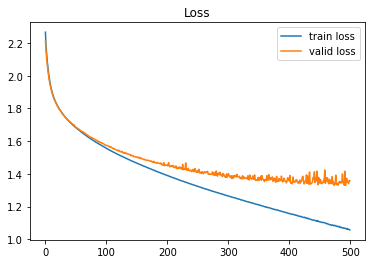

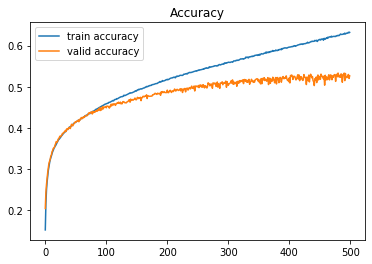

In [9]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()